## **1. About this project...**



In this project, I'll take you through a journey where we'll analyze **500,000** tweets about **ChatGPT from January to March**. ChatGPT has been the hottest topic of 2023. With social media platforms like Twitter buzzing with discussions about this innovative technology, I knew this was the perfect source of massive data that could also evolve over time. 

**Dataset:** The collected data dates from **January 4th 2023 to March 29th 2023 (almost 3 months)**, providing a long enough timescale to observe trends starting from 2023.

By cleaning, visualizing, and performing various analyses on this homemade data set, w'll uncover **key events** in this timeline, the **most frequent topics** about ChatGPT, **most mentioned @accounts & #hashtags**, and the overall **emotions** associated with this innovative technology. 

This detailed analysis will provide valuable insights into the benefits, concerns, and potential applications of ChatGPT, shedding light on its impact and role in shaping the future of AI-powered conversational technologies. So let's dive in!

### What we'll do:

1. Data Cleaning/Preprocessing

2.  Topic Modeling using LDA 

3.  Exploratory Data Analysis
*   Relationship between likes & retweets 
*   Timeline of key events by volume of tweets/(day/week/month)

4.  Impacts of key AI events on Tech stocks

5.  Top @mentions, #hashtags and users with highest tweet volume

6.  Most influential users and most liked tweets

7.  Top Bigrams, Trigrams, 

8.  WordCloud of unigrams, @mentions and #hashtags

9.  Sentiments Analysis, on top @accounts and topics 

### To be looked at
*   Predictive modeling


Finally: Can create an interactive dashboard in python https://dash.plotly.com/


## **2. Install and import libraries and dependencies**

In [1]:
!pip install wordcloud
!pip install TextBlob
!pip install chart-studio
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 KB 2.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import chart_studio
import re
import string
import collections
import ipywidgets
import cufflinks
import nltk.tokenize

import pandas as pd
import datetime
import seaborn as sns
import chart_studio.plotly as py
import chart_studio.tools as tls
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import nltk
import gensim
import yfinance as yf

from textblob import TextBlob
from google.colab import widgets
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from tqdm.notebook import tqdm
from nltk.stem.wordnet import WordNetLemmatizer
from gensim import corpora

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

### Scraping 500k tweets on "ChatGPT" topic from Jan-Mar 2023

For a comprenhive guide on scraping tweets with ease, checkout  this link


## **3. Importing the data** - *CHANGE THIS PART BEFORE RELEASE*


#### I've already scraped 500k tweets which took over 7 hours

In [7]:
! gdown --id 1jLWmfoTA-HAZR8ZXAoROsiNROI43TWqZ

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1jLWmfoTA-HAZR8ZXAoROsiNROI43TWqZ
To: /content/my_data_500k.csv
100% 117M/117M [00:01<00:00, 108MB/s]


In [8]:
tweet_df = pd.read_csv('/content/my_data_500k.csv')

## **4. Understanding the Dataframe**

In [9]:
#I'll create a copy of my dataframe, just incase I mess it up :p
df = tweet_df.copy(deep = True)

In [10]:
df.head()

date                   id  \
0  2023-03-29 22:58:21+00:00  1641213230730051584   
1  2023-03-29 22:58:18+00:00  1641213218520481805   
2  2023-03-29 22:57:53+00:00  1641213115684536323   
3  2023-03-29 22:57:52+00:00  1641213110915571715   
4  2023-03-29 22:57:26+00:00  1641213003260633088   

                                             content        username  \
0  Free AI marketing and automation tools, strate...  RealProfitPros   
1           @MecoleHardman4 Chat GPT says it’s 15. 😂    AmyLouWho321   
2  https://t.co/FjJSprt0te - Chat with any PDF!\n...      yjleon1976   
3  AI muses: "In the court of life, we must all f...  ChatGPT_Thinks   
4  Most people haven't heard of Chat GPT yet.\nFi...   nikocosmonaut   

   like_count  retweet_count  
0         0.0            0.0  
1         0.0            0.0  
2         0.0            0.0  
3         0.0            0.0  
4         0.0            0.0

In [11]:
print("Length: ",len(tweet_df))
print("Shape: ",df.shape)

Length:  500036
Shape:  (500036, 6)


In [12]:
# Descriptive statistics on likes and retweets
print(df[['like_count', 'retweet_count']].describe())

          like_count  retweet_count
count  499974.000000  499974.000000
mean        7.123208       1.481523
std       216.366469      46.254101
min         0.000000       0.000000
25%         0.000000       0.000000
50%         1.000000       0.000000
75%         2.000000       0.000000
max     64094.000000   16080.000000


In [13]:
# Checking the number of unique values in each column
for col in df.columns:
    print(col, ":", df[col].nunique())

date : 475394
id : 500007
content : 493744
username : 250006
like_count : 1066
retweet_count : 489


## **5. Data Preprocessing**

### Preprocessing 1.1: 


1.   Drop Null values, date column values to datetime objects
2.   Remove links, #, @  and unwanted characters



In [14]:
# check for missing values
print(df.isnull().sum())

date              0
id                6
content           6
username         34
like_count       62
retweet_count    62
dtype: int64


In [15]:
# Remove missing values
df = df.dropna()
print("Length: ",len(df))

Length:  499974


At the moment we are only interested in the Date information of Date column, so we'll remove the time component of it

In [16]:
# Convert the 'date' column to a datetime object
df['date'] = pd.to_datetime(df['date'])

# Extract the date component and assign it to the 'date' column
df['date'] = df['date'].dt.date

# again convert this extraced component to datetime object
df['date'] = pd.to_datetime(df['date'])

In [17]:
# Just to make sure
df.head(1)

date                   id  \
0 2023-03-29  1641213230730051584   

                                             content        username  \
0  Free AI marketing and automation tools, strate...  RealProfitPros   

   like_count  retweet_count  
0         0.0            0.0

In [18]:
# Checking range of dates
print("Start Date: " ,df['date'].min())
print("End Date: " ,df['date'].max())

Start Date:  2023-01-04 00:00:00
End Date:  2023-03-29 00:00:00


That's 3 months (almost)

In [19]:
# Checking the number of unique values in each column
for col in df.columns:
    print(col, ":", df[col].nunique())

date : 85
id : 499974
content : 493705
username : 249998
like_count : 1066
retweet_count : 489


In [20]:
def pre_process(text):
    # Remove links
    text = re.sub('http://\S+|https://\S+', '', text)
    text = re.sub('http[s]?://\S+', '', text)
    text = re.sub(r"http\S+", "", text)

    text = re.sub('&amp', 'and', text)
    text = re.sub('&lt', '<', text)
    text = re.sub('&gt', '>', text)

    # Remove new line characters
    text = re.sub('[\r\n]+', ' ', text)

    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    # text = re.sub(r'@\w+', lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x.group(0)), text) #Keeps the character trailing @
    # text = re.sub(r'#\w+', lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x.group(0)), text) #Keeps the character trailing #

    # Remove multiple space characters
    text = re.sub('\s+',' ', text)
    
    # Convert to lowercase
    text = text.lower()
    return text

In [21]:
df['processed_content'] = df['content'].apply(pre_process)

In [22]:
# Checking the number of unique values in each column
for col in df.columns:
    print(col, ":", df[col].nunique())

date : 85
id : 499974
content : 493705
username : 249998
like_count : 1066
retweet_count : 489
processed_content : 458210




---



---



### Preprocessing 1.2:

Removing Duplicates, Spam, Redundency



#### 1.2.1 Understanding the repetition and duplicates

In [23]:
# Value counts for the 'content' column
content_counts = df['content'].value_counts()
print("Top 10 most frequent tweets in 'content':")
print("\n")
print(content_counts.head(20))
print("\n")
print("\n")
# Value counts for the 'preprocessed_content' column
preprocessed_content_counts = df['processed_content'].value_counts()
print("Top 10 most frequent tweets in 'preprocessed_content':")
print('\n')
print(preprocessed_content_counts.head(20))


Top 10 most frequent tweets in 'content':


Chat GPT                                                                                                                                                                                                                                                                             126
@themattmic Chat GPT                                                                                                                                                                                                                                                                 121
@Timtwttt Chat GPT                                                                                                                                                                                                                                                                    84
te amo chat gpt                                                                                                  

#### 1.2.2 Removing duplicates, spam, redundency

So here's the thing!
*   original content count : 499974
*   unique content : 493705
*   unique processed_content : 458210

It's a good idea to start the analysis with the DataFrame containing unique preprocessed content (458,210 tweets) to focus on unique insights and reduce the impact of noise or repeated content.

In [24]:
df.head(1)

date                   id  \
0 2023-03-29  1641213230730051584   

                                             content        username  \
0  Free AI marketing and automation tools, strate...  RealProfitPros   

   like_count  retweet_count  \
0         0.0            0.0   

                                   processed_content  
0  free ai marketing and automation tools, strate...

In [25]:
#I'll make a copy of our dataframe before removing the duplicate values based on 'preprocessed_content' column
df_backup = df.copy(deep=True)

We'll only keep the copies ones with the highest engagement (like_count), we'll 
1. sort the dataframe based on the engagement metric  
2. drop duplicates based on 'processed_content'
3. sort the dataframe again based on index

In [26]:
df_sorted = df.sort_values(by='like_count', ascending=False)
df_cleaned = df_sorted.drop_duplicates(subset='processed_content', keep='first')
# Sort dataframe by index
df_final = df_cleaned.sort_index()

In [27]:
df = df_final

In [28]:
print("Length of Dataframe: ",len(df))

Length of Dataframe:  458210


In [29]:
df.columns

Index(['date', 'id', 'content', 'username', 'like_count', 'retweet_count',
       'processed_content'],
      dtype='object')

This makes the length of our dataframe **458210 from nearly 500k**. A lot of redundency and repeated content. Remember there are always pros and cons of these steps but here pros outweight the cons for our analysis



---


---





## **6. Topic Modeling LDA** - on top 10000 most liked tweets

what topics are the most popular?

### 6.1 Topic Modeling - LDA

In [30]:
# Let's sort the dataframe and get top 10000 most liked tweets
df_sorted = df.sort_values(by='like_count', ascending=False)
df_top_10000 = df_sorted.iloc[:10000]

In [31]:
# Text Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
docs = df_top_10000['processed_content'].apply(lambda x: [lemmatizer.lemmatize(word) for word in nltk.word_tokenize(x.lower()) if word.isalpha() and word not in stop_words])

In [32]:
# Create a dictionary of words and their frequency
dictionary = corpora.Dictionary(docs)

In [33]:
# Create a document-term matrix
corpus = [dictionary.doc2bow(doc) for doc in docs]

In [34]:
# Topic modeling using LDA
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=100, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)

In [35]:
# Print the topics and their top words
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))
    print('\n')

Topic: 0 
Words: 0.054*"like" + 0.038*"using" + 0.036*"know" + 0.026*"make" + 0.023*"people" + 0.021*"google" + 0.020*"need" + 0.018*"student" + 0.017*"u" + 0.015*"even"


Topic: 1 
Words: 0.061*"asked" + 0.051*"write" + 0.045*"get" + 0.025*"answer" + 0.024*"question" + 0.023*"future" + 0.023*"today" + 0.022*"ask" + 0.020*"help" + 0.017*"check"


Topic: 2 
Words: 0.115*"chatgpt" + 0.030*"model" + 0.029*"think" + 0.024*"see" + 0.023*"openai" + 0.021*"say" + 0.017*"video" + 0.017*"many" + 0.016*"everyone" + 0.013*"api"


Topic: 3 
Words: 0.039*"much" + 0.027*"learn" + 0.023*"result" + 0.022*"word" + 0.020*"version" + 0.019*"link" + 0.018*"microsoft" + 0.018*"large" + 0.016*"company" + 0.016*"two"


Topic: 4 
Words: 0.025*"data" + 0.025*"technology" + 0.024*"let" + 0.023*"week" + 0.021*"next" + 0.018*"chatbot" + 0.016*"game" + 0.014*"coming" + 0.014*"project" + 0.014*"style"


Topic: 5 
Words: 0.059*"response" + 0.047*"read" + 0.035*"said" + 0.034*"real" + 0.033*"interesting" + 0.025*"abl

### 6.2 Understanding the topics:





**Topic 0:** General discussion about using Google products and their impact on people and users.

**Topic 1:** Questions and answers about the future, with a focus on asking for help or information.

**Topic 2:** Discussion about the ChatGPT model by OpenAI, its capabilities, and related APIs.

**Topic 3:** Learning and the role of companies like Microsoft in developing AI and large-scale models.

**Topic 4:** New technologies and projects in data, chatbots, and gaming.

**Topic 5:** Interesting reads, real-life applications, and potential solutions in AI.

**Topic 6:** Language models, their quality, and new developments in the field.

**Topic 7:** The importance of generative models and their potential uses.

**Topic 8:** Chat features, user experience, and the role of GPT in generating text.

**Topic 9:** AI tools, their use in the workplace, and their potential impact on various tasks.

## **7. EDA - Timeline, Trends, Popularity**

### 7.1 Relationship: Likes and Retweets

Scatter and Regression Plots 

In [36]:
# Cap the like count and retweet count to a maximum value
max_like_count = 2000
max_retweet_count = 500

df_plot = df.copy()
df_plot.loc[df_plot['like_count'] > max_like_count, 'like_count'] = max_like_count
df_plot.loc[df_plot['retweet_count'] > max_retweet_count, 'retweet_count'] = max_retweet_count

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



<Axes: xlabel='like_count', ylabel='retweet_count'>

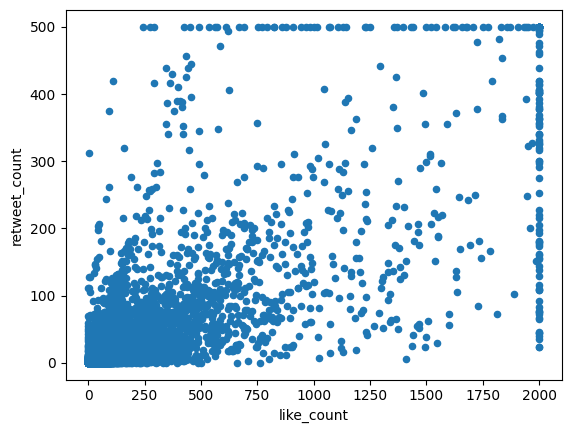

In [37]:
# Scatter plot of likes vs. retweets
df_plot.plot.scatter(x='like_count', y='retweet_count')

<Axes: xlabel='like_count', ylabel='retweet_count'>

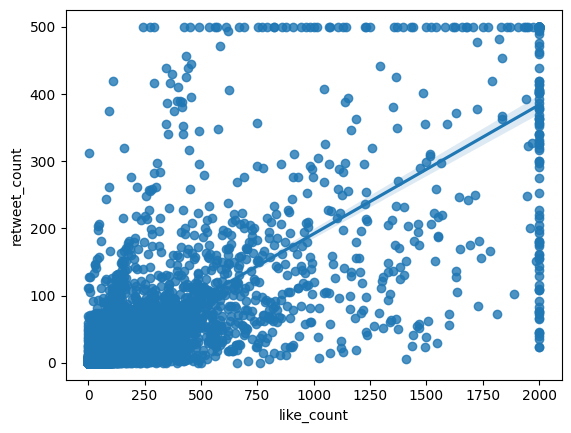

In [38]:
# Regression plot to understand the relationship between likes and retweets
sns.regplot(x='like_count', y='retweet_count', data=df_plot)

In [39]:
df.head(1)

date                   id  \
0 2023-03-29  1641213230730051584   

                                             content        username  \
0  Free AI marketing and automation tools, strate...  RealProfitPros   

   like_count  retweet_count  \
0         0.0            0.0   

                                   processed_content  
0  free ai marketing and automation tools, strate...

In [40]:
# Set seaborn style
sns.set_style('darkgrid')


### 7.2 Timeline Analysis
[ChatGPT Timeline](https://timelines.issarice.com/wiki/Timeline_of_ChatGPT)

*Let's see what this fuss is all about*



#### 7.2.1 Tweets/day Jan,Feb,Mar

In [41]:
# Dates with highest tweet counts
top_tweet_dates = df.groupby(pd.Grouper(key='date', freq='D')).size().reset_index(name='count').sort_values(by='count', ascending=False)
print(top_tweet_dates.head(10))

         date  count
70 2023-03-15  10841
34 2023-02-07  10244
71 2023-03-16   8946
35 2023-02-08   8559
79 2023-03-24   8008
72 2023-03-17   7966
69 2023-03-14   7884
76 2023-03-21   7499
83 2023-03-28   7467
36 2023-02-09   7367


In [42]:
# Number of tweets per day
tweets_by_day = df.groupby(pd.Grouper(key='date', freq='D')).size().reset_index()
tweets_by_day.columns = ['date', 'count']
fig2 = px.bar(tweets_by_day, x='date', y='count', title='Number of Tweets per Day', color = 'count')
fig2.update_xaxes(tickangle=45, tickformat='%Y-%m-%d')
fig2.show()

##### **Understanding the peaks**

**Feb 7 2023 (11847 tweets):** **Google** presents its own AI chatbot called **Bard**, which is similar to ChatGPT.

**Feb 8 2023(9242 tweets):** 3 interesting events

1.   (Competition) Chinese company Alibaba Group announces that it is developing a rival to OpenAI's ChatGPT AI chatbot.
2.   (Study) A study explores the potential of ChatGPT, a popular AI chatbot, in generating academic essays that can **evade plagiarism** detection tools.
3. A paper proposes a framework for **evaluating interactive language learning models (LLMs)** such as ChatGPT using publicly available data sets. The authors evaluate ChatGPT's performance on 23 data sets covering eight different NLP tasks and find that ChatGPT **outperforms** other LLMs on most tasks, but has a **lower accuracy in reasoning** and suffers from **hallucination problems**.

**March 15 2023 (10929 tweets):** On March 14th OpenAI announces **GPT-4**, the latest and **most capable** AI language model in its line of language models

**March 17 2023 (9873 tweets):** **Sam Altman (CEO of OpenAI)** after the release of GPT-4 appears in an interview with ABC News and says that AI technology will reshape society as we know it, but that it comes with real dangers.

**March 24 2023 (8638 tweets):** OpenAI announces ChatGPT implementation **support for plugins**, which are tools designed for language models to access up-to-date information, run computations, or use third-party services with safety as a core principle.

#### 7.2.2 Tweets/week & Tweets/month

In [43]:
# Number of tweets per week (bar plot)
tweets_by_week = df.groupby(pd.Grouper(key='date', freq='W-MON')).size().reset_index()
tweets_by_week.columns = ['week', 'count']
tweets_by_week['week_start'] = tweets_by_week['week'].dt.strftime('%Y-%m-%d')
tweets_by_week['week_end'] = (tweets_by_week['week'] + pd.Timedelta(days=6)).dt.strftime('%Y-%m-%d')
fig = px.bar(tweets_by_week, x='week_start', y='count', title='Number of Tweets per Week', height=400, width=800, color = 'count')
fig.update_xaxes(tickangle=45)

fig.show()

In [44]:
tweets_by_month = df.groupby(pd.Grouper(key='date', freq='M')).size().reset_index(name='count')
fig = px.bar(tweets_by_month, x='date', y='count', title='Number of Tweets by Month', height=400, width=400, color = 'count')
fig.update_xaxes(title_text='Month')
fig.update_yaxes(title_text='Count')
fig.show()



---



---



---




## **8. Stock impacts from major AI developments**





MICROSOFT (major investor in OpenAI) 

GOOGLE (BARD - Major Competitor to ChatGPT by OpenAI)

META (Competitior)

NVIDIA (Nvidia GPUs used by Microsoft which helped OpenAI train ChatGPT)

In [45]:
# Fetch stock data for MSFT, Google, and other competitors
start_date = '2023-01-04'
end_date = '2023-03-29'
ticker_symbols = ['MSFT', 'GOOGL', 'AMZN', 'META', 'NVDA', 'IBM'] 
stocks_df = yf.download(ticker_symbols, start=start_date, end=end_date)['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [46]:
# Number of tweets per day
tweets_by_day = df.groupby(pd.Grouper(key='date', freq='D')).size().reset_index()
tweets_by_day.columns = ['date', 'count']

# Create a combined plot
fig = go.Figure()

# Add tweet count trace
fig.add_trace(go.Bar(x=tweets_by_day['date'], y=tweets_by_day['count'], name='Tweet Count', opacity=0.5))

# Add stock price traces
for symbol in ticker_symbols:
    fig.add_trace(go.Scatter(x=stocks_df.index, y=stocks_df[symbol], name=symbol, yaxis='y2'))

# Customize the layout
fig.update_layout(
    title='Stock Prices and Tweet Counts',
    xaxis=dict(title='Date', tickangle=45, tickformat='%Y-%m-%d'),
    yaxis=dict(title='Tweet Count', side='left'),
    yaxis2=dict(title='Stock Price', side='right', overlaying='y1', position=0.95),
    width=1200, height=800
)
#fig.update_layout(width=1200, height=800)
fig.show()

2 Major dates:

1.   **Feb 7 2023 (Google BARD released)**

*   Microsoft & Nvidia **⤴** 
*   Meta (Facebook) **↘**
*   Google (BARD complications) **↘**
*   Amazon, IBM **➖**

2.   **Mar 14 2023 (GPT 4 released)**

*   Microsoft & Nvidia **⤴** 
*   Meta (Facebook) **⤴↘➖**
*   Google, Amazon, IBM **➖**




---



---



---






## **8. Top #Hashtag @mention and usernames**

In [47]:
# Static plot

# # Most active users, most used hashtags, and mentions
# plt.figure(figsize=(20, 8))
# hashtags = df['content'].str.findall(r'#\w+')
# hashtags_count = hashtags.explode().value_counts()
# sns.barplot(x=hashtags_count.index[:20], y=hashtags_count[:20])
# plt.xticks(rotation=45)
# plt.show()

We'll remove #ChatGPT from the list as it's an obvious one

In [48]:
# Most used hashtags
hashtags = df['content'].str.findall(r'#\w+')
hashtags_count = hashtags.explode().value_counts()
fig_hashtags = px.bar(x=hashtags_count.index[1:21], y=hashtags_count[1:21], title='Top 20 Hashtags',color = hashtags_count[1:21]) #color_discrete_sequence=['#00CC96']
fig_hashtags.update_xaxes(tickangle=45)
fig_hashtags.update_layout(width=1200, height=800)
fig_hashtags.show()

In [49]:
# Static plot

# plt.figure(figsize=(20, 8))
# mentions = df['content'].str.findall(r'@\w+')
# mentions_count = mentions.explode().value_counts()
# sns.barplot(x=mentions_count.index[:20], y=mentions_count[:20])
# plt.xticks(rotation=45)
# plt.show()

In [50]:
# Most mentioned users
mentions = df['content'].str.findall(r'@\w+')
mentions_count = mentions.explode().value_counts()
fig_mentions = px.bar(x=mentions_count.index[:20], y=mentions_count[:20], title='Top 20 Mentions', color=mentions_count[:20])
fig_mentions.update_xaxes(tickangle=45)
fig_mentions.update_layout(width=1200, height=800)

fig_mentions.show()

In [51]:
# Static plot

# plt.figure(figsize=(20, 8))
# tweets_by_user = df.groupby('username').size().sort_values(ascending=False)
# sns.barplot(x=tweets_by_user[:20], y=tweets_by_user[:20].index)
# plt.show()

In [52]:
df.columns

Index(['date', 'id', 'content', 'username', 'like_count', 'retweet_count',
       'processed_content'],
      dtype='object')

In [53]:
# Most active users
tweets_by_user = df.groupby('username').size().sort_values(ascending=False)
fig_users = px.bar(y=tweets_by_user.index[:20], x=tweets_by_user[:20], title='Top 20 Active Users', orientation='h', color=tweets_by_user[:20])
fig_users.update_layout(width=1200, height=800)
fig_users.show()

### **Try:** split the dataframe by Months and do these analyses on each month to understand monthly trends and things users are talking about

## **9 Most liked tweets && Most Influential Users**



It  can be observed that most liked tweets also represent which topics public supports and cares about:
Some interesting mentions from the below top 10 most liked tweets include
1. @sama aka **Sam Altman (CEO of OpenAI)** announcing release of **GPT-4** on March 14th 2023
2. Misinformed tweet by **@AlexHarmozi (multimillionaire and YouTuber)** which contained an image of a dot and a massive circle that was depicting ChatGPT vs. GPT-4. This helped perpetuate a massive hype campaign in favour of **OpenAI**.
3. **@lexfridman** a reputed personality in the field of **Computer Science and Machine Learning** and podcaster announcing his podcast episode with **Sam Altman (CEO of OpenAI)** on March 16th 2023
4. Other tweets are about ChatGPT include people **expressing sense of humor, spreading informative tools, and the impacts** they see in real time. 

In [54]:
df.sort_values(by='like_count', ascending=False).head(10)[['date','like_count','username','content']]

date  like_count         username  \
342707 2023-02-03     64094.0    MoistCr1TiKaL   
458850 2023-01-13     63835.0       johnvianny   
164991 2023-03-06     44940.0             rgay   
487957 2023-01-07     42125.0        aaronsiim   
463662 2023-01-12     38278.0  kevinschawinski   
434201 2023-01-18     37048.0  writingtoriches   
5121   2023-03-29     28049.0        ProudFede   
123398 2023-03-14     22310.0             sama   
472002 2023-01-10     21476.0      AlexHormozi   
98971  2023-03-16     20827.0       lexfridman   

                                                  content  
342707  Writing erotic prompts for Chat GPT hoping to ...  
458850  Best AI Tools You Need To Know\n#chatgpt #chat...  
164991  I am pretty sure I am reading my first CHAT GP...  
487957  ultra-modern generative ai🗨️: \n\n• AI2\n• AI2...  
463662  First #ChatGPT answer which made me pause. htt...  
434201  AI copywriting tools to check out:\n\n1. Chat ...  
5121    Chat GPT reveals “The Best 11 Of All Time” htt...  
123398  here is GPT-4, our most capable and aligned mo...  
472002  This is a frightening visual for me. \n\nThe f...  
98971   I'm doing podcast with Sam Altman (@sama), CEO...

The power users! Most influential users by total number of tweet likes and retweet 

In [55]:
# Group by 'username' and sum the 'like_count' for each user
user_likes = df.groupby('username')['like_count'].sum().reset_index()

# Sort the DataFrame by total likes in descending order
user_likes_sorted = user_likes.sort_values(by='like_count', ascending=False)

# Top 10 most influential users by likes
user_likes_sorted.head(10)

username  like_count
29404          DataChaz    122714.0
72788     MoistCr1TiKaL     64094.0
173027       johnvianny     63876.0
206761             rgay     44940.0
121632        aaronsiim     42934.0
180626       lexfridman     40289.0
234023  writingtoriches     39425.0
176791  kevinschawinski     38320.0
39709       FirstWeekHQ     33114.0
85792         ProudFede     28049.0

In [56]:
# Group by 'username' and sum the 'retweet_count' for each user
user_tweets = df.groupby('username')['retweet_count'].sum().reset_index()

# Sort the DataFrame by total likes in descending order
user_tweets_sorted = user_tweets.sort_values(by='retweet_count', ascending=False)

# Top 10 most influential users by retweets
user_tweets_sorted.head(10)

username  retweet_count
29404          DataChaz        25732.0
173027       johnvianny        16096.0
121632        aaronsiim        11710.0
234023  writingtoriches        10712.0
157517        garryflix         8194.0
142718     crypto_bearr         8060.0
106848   TheRavenCrypto         5429.0
32471     Dmailofficial         5114.0
168099         ispolink         4849.0
154021       eyishazyer         4762.0

## **10. Top Bigrams and Trigrams**



Now we'll drop (date, username, like_count, retweet_count) columns as we're interested in text analysis

In [57]:
# df backup point before dropping irrelevant rows for further analysis
df_backup1 = df.copy(deep = True)

In [58]:
#df = df.drop(['date','username', 'like_count', 'retweet_count'], axis = 1)

In [59]:
df.head(1)

date                   id  \
0 2023-03-29  1641213230730051584   

                                             content        username  \
0  Free AI marketing and automation tools, strate...  RealProfitPros   

   like_count  retweet_count  \
0         0.0            0.0   

                                   processed_content  
0  free ai marketing and automation tools, strate...

In [60]:
len(df)

458210

In [61]:
df.columns

Index(['date', 'id', 'content', 'username', 'like_count', 'retweet_count',
       'processed_content'],
      dtype='object')

In [62]:
def get_top_n_ngrams(corpus, n=None, ngram=2):
    vec = CountVectorizer(ngram_range=(ngram, ngram), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

In [63]:
# Get top 20 bigrams
common_bigrams = get_top_n_ngrams(df['processed_content'], 20, ngram=2)

# Get top 20 trigrams
common_trigrams = get_top_n_ngrams(df['processed_content'], 20, ngram=3)

In [64]:
df_bigrams = pd.DataFrame(common_bigrams, columns=['NgramText', 'count'])
df_trigrams = pd.DataFrame(common_trigrams, columns=['NgramText', 'count'])

In [65]:
# Plot bigrams
fig_bigrams = px.bar(df_bigrams[1:], x='NgramText', y='count', title='Bigram Counts')
fig_bigrams.show()

In [66]:
# Plot trigrams
fig_trigrams = px.bar(df_trigrams, x='NgramText', y='count', title='Trigram Counts')
fig_trigrams.show()

## **11. WordClouds**

### 11.1 Lemmatize

In [67]:
df.head(1)

date                   id  \
0 2023-03-29  1641213230730051584   

                                             content        username  \
0  Free AI marketing and automation tools, strate...  RealProfitPros   

   like_count  retweet_count  \
0         0.0            0.0   

                                   processed_content  
0  free ai marketing and automation tools, strate...

In [68]:
# Initialize Lemmatize
wordnet_lem = WordNetLemmatizer()

# Lemmatize processed text and join everything in a list
df['content_lem'] = df['processed_content'].apply(wordnet_lem.lemmatize)
all_words_lem = ' '.join([word for word in df['content_lem']])

In [69]:
df.head(1)

date                   id  \
0 2023-03-29  1641213230730051584   

                                             content        username  \
0  Free AI marketing and automation tools, strate...  RealProfitPros   

   like_count  retweet_count  \
0         0.0            0.0   

                                   processed_content  \
0  free ai marketing and automation tools, strate...   

                                         content_lem  
0  free ai marketing and automation tools, strate...

### 11.2 Unigram Wordcloud

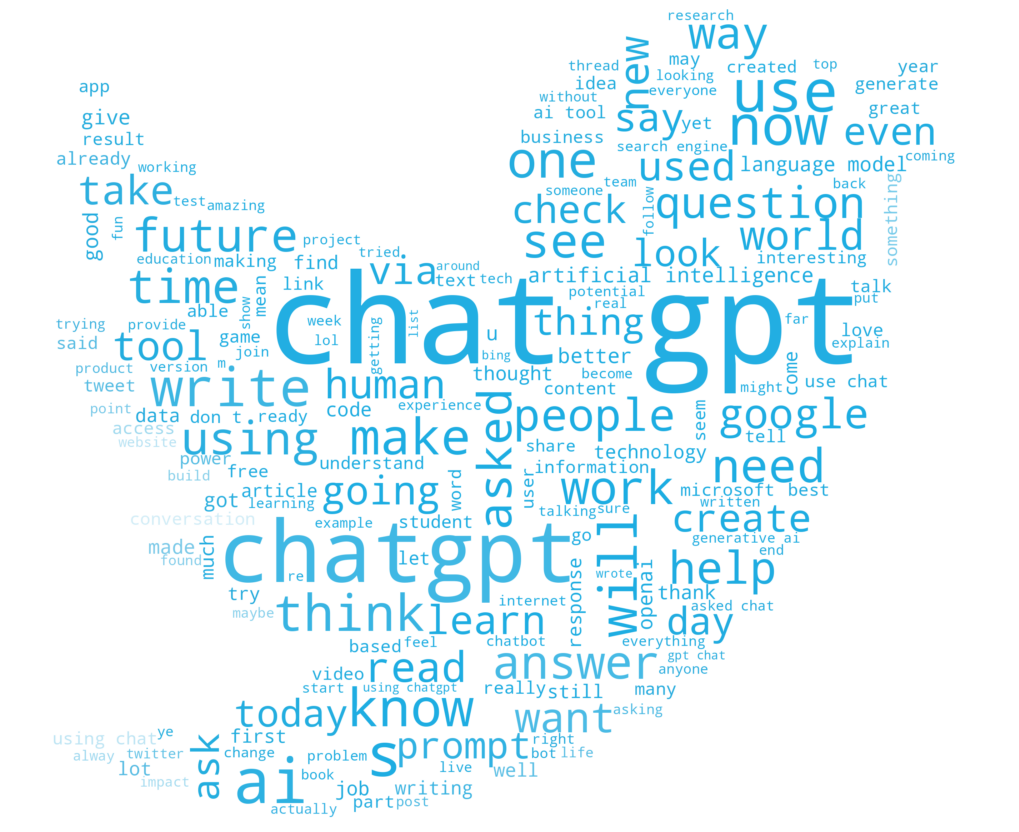

In [70]:
# def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
#     return "#00A67E"  # Replace this with your desired hex color


# Generate a word cloud image
mask = np.array(Image.open("/content/twitter_logo1.jpg"))
stopwords = set(STOPWORDS)

wordcloud_twitter = WordCloud(height=2000,width=2000,background_color="white",mode="RGBA",stopwords=stopwords,mask=mask).generate(all_words_lem)

# Create coloring from the image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,10])
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(wordcloud_twitter.recolor(color_func=image_colors), interpolation="bilinear")

# Store visualization to file
plt.savefig("twitter_logo_unigram_words.png", format="png")

plt.show()

### 11.3 Mentions Wordcloud

In [71]:
# # Retrieves all occurrences of @+text
# df['mentions'] = df['content'].str.findall(r'@\w+')
# # Removes the @ in front
# df['mentions'] = [list(map(lambda x: x[1:], mentions)) for mentions in df['mentions']]
# # Converts the list of words in each row to a string
# df['mentions_string'] = df['mentions'].apply(lambda x: ' '.join(x))
# # Concatenates all strings in one string
# all_mentions = ' '.join([word for word in df['mentions_string']])

In [72]:
# Extract mentions and concatenate all mentions in one string
all_mentions = ' '.join([mention[1:] for mentions in df['content'].str.findall(r'@\w+') for mention in mentions])

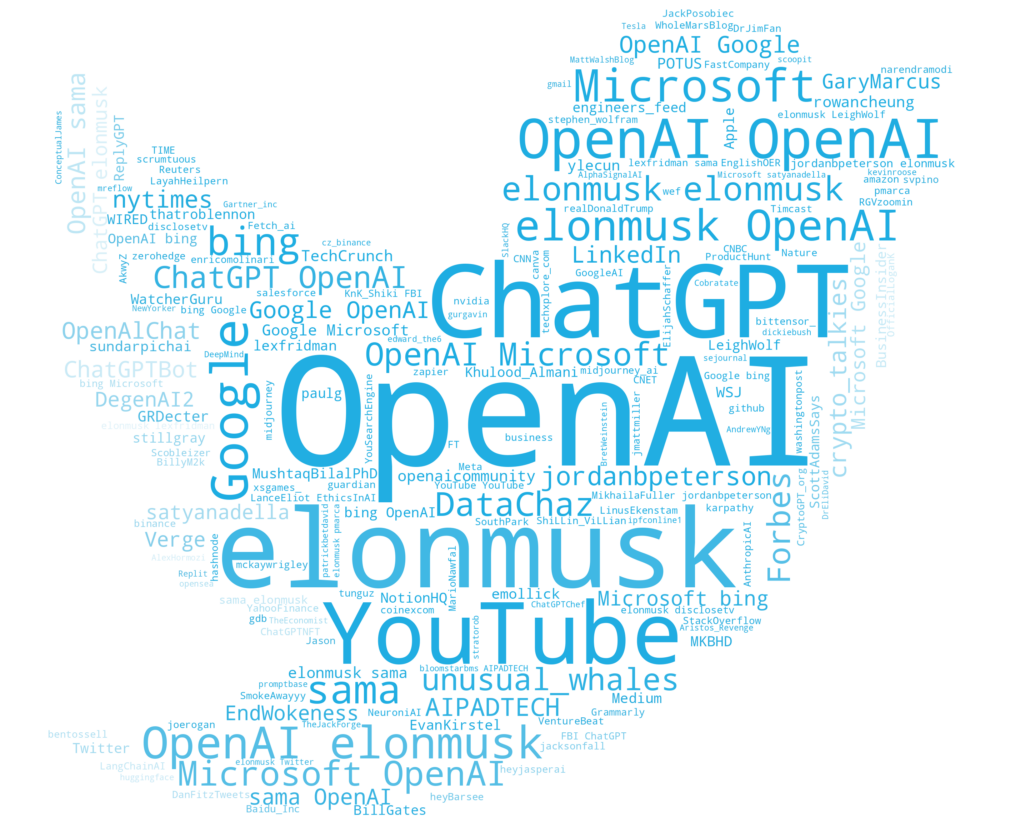

In [73]:
wordcloud_twitter = WordCloud(height=2000,width=2000,background_color="white",mode="RGBA",stopwords=stopwords,mask=mask).generate(all_mentions)

# Create coloring from the image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,10])
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(wordcloud_twitter.recolor(color_func=image_colors), interpolation="bilinear")

# Store visualization to file
plt.savefig("twitter_logo_unigram_mentions.png", format="png")

plt.show()

### 11.4 Hashtag Wordcloud

In [74]:
# # Retrieves all occurrences of #+text
# df['hashtags'] = df['content'].str.findall(r'#\w+')
# # Removes the @ in front
# df['hashtags'] = [list(map(lambda x: x[1:], hashtags)) for hashtags in df['hashtags']]
# # Converts the list of words in each row to a string
# df['hashtags_string'] = df['hashtags'].apply(lambda x: ' '.join(x))
# # Concatenates all strings in one string
# all_hashtags = ' '.join([word for word in df['hashtags_string']])

In [75]:
# Extract hashtags and concatenate all hashtags in one string
all_hashtags = ' '.join([hashtag[1:] for hashtags in df['content'].str.findall(r'#\w+') for hashtag in hashtags])

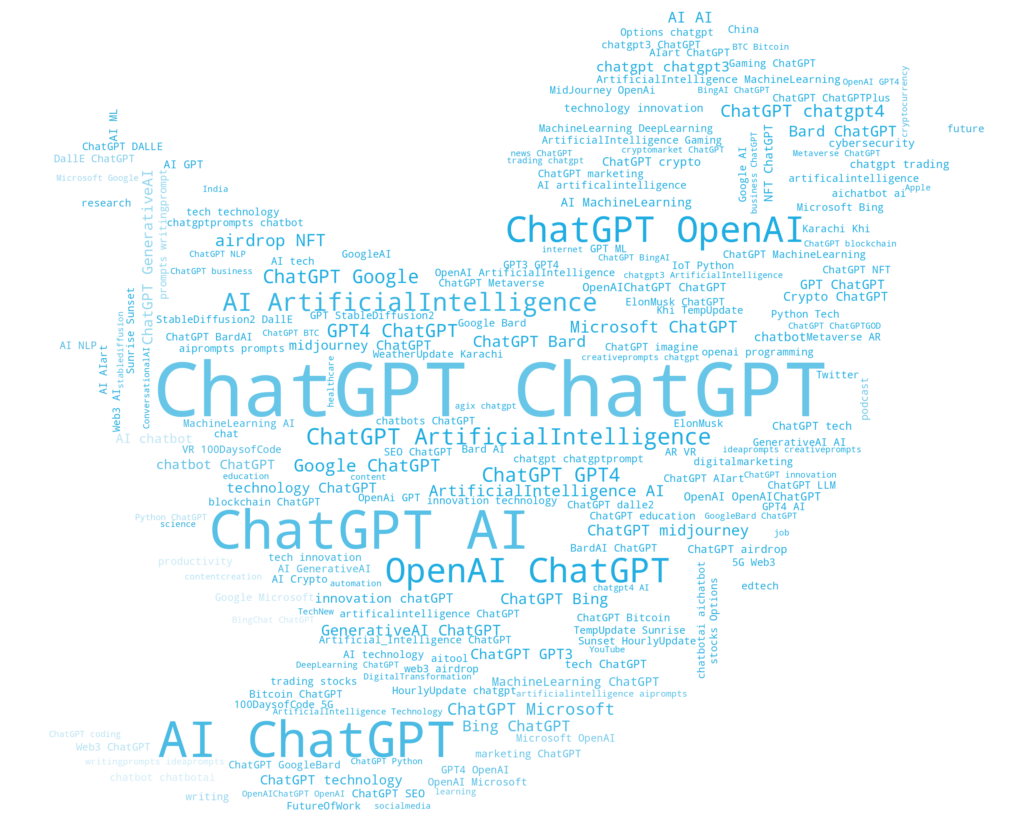

In [76]:
wordcloud_twitter = WordCloud(height=2000,width=2000,background_color="white",mode="RGBA",stopwords=stopwords,mask=mask).generate(all_hashtags)

# Create coloring from the image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,10])
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(wordcloud_twitter.recolor(color_func=image_colors), interpolation="bilinear")

# Store visualization to file
plt.savefig("twitter_logo_unigram_hashtags.png", format="png")

plt.show()

In [77]:
df.head()

date                   id  \
0 2023-03-29  1641213230730051584   
1 2023-03-29  1641213218520481805   
3 2023-03-29  1641213110915571715   
4 2023-03-29  1641213003260633088   
5 2023-03-29  1641212975012016128   

                                             content        username  \
0  Free AI marketing and automation tools, strate...  RealProfitPros   
1           @MecoleHardman4 Chat GPT says it’s 15. 😂    AmyLouWho321   
3  AI muses: "In the court of life, we must all f...  ChatGPT_Thinks   
4  Most people haven't heard of Chat GPT yet.\nFi...   nikocosmonaut   
5  @nytimes No! Chat Gpt has been putting togethe...      cordydbarb   

   like_count  retweet_count  \
0         0.0            0.0   
1         0.0            0.0   
3         0.0            0.0   
4         0.0            0.0   
5         0.0            0.0   

                                   processed_content  \
0  free ai marketing and automation tools, strate...   
1                           chat gpt says it’s 15. 😂   
3  ai muses: "in the court of life, we must all f...   
4  most people haven't heard of chat gpt yet. fir...   
5   no! chat gpt has been putting together amazin...   

                                         content_lem  
0  free ai marketing and automation tools, strate...  
1                           chat gpt says it’s 15. 😂  
3  ai muses: "in the court of life, we must all f...  
4  most people haven't heard of chat gpt yet. fir...  
5   no! chat gpt has been putting together amazin...

## **13. Sentiment Analysis**

### 13.1 Overall Sentiment

In [78]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

df['vader_polarity'] = df['processed_content'].map(lambda text: sid.polarity_scores(text)['compound']) 

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [79]:
from textblob import TextBlob

df['blob_polarity'] = df['processed_content'].map(lambda text: TextBlob(text).sentiment.polarity)

In [80]:
df.head(1)

date                   id  \
0 2023-03-29  1641213230730051584   

                                             content        username  \
0  Free AI marketing and automation tools, strate...  RealProfitPros   

   like_count  retweet_count  \
0         0.0            0.0   

                                   processed_content  \
0  free ai marketing and automation tools, strate...   

                                         content_lem  vader_polarity  \
0  free ai marketing and automation tools, strate...          0.5106   

   blob_polarity  
0       0.268182

In [81]:
polarity_df = df[['vader_polarity', 'blob_polarity']]
polarity_df = polarity_df.rename(columns={'vader_polarity': 'Vader','blob_polarity': 'TextBlob'})

fig = px.histogram(polarity_df, x=['Vader', 'TextBlob'], nbins=40, barmode='group', color_discrete_sequence=['#1DA1F2', '#00CC96'])
fig.update_layout(title='Distributions of sentimental polarities Vader Vs. TextBlob', xaxis_title='Polarity', yaxis_title='Count')
fig.show()

### 13.2 Topic Sentiment

In [82]:
stop_words = nltk.corpus.stopwords.words('english')

def remove_stop_words(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

df['stop_content'] = df['processed_content'].apply(lambda x: remove_stop_words(x))

In [87]:
# We define a list of topics
topics = ['ai', 'chatgpt', 'elonmusk', 'openai', 'google', 'sama', 'microsoft' ,'youtube', 'billgates', 'linkedin', 'bing', 'midjourney']

# We create a new column Topic
df['Topic'] = ""
for topic in topics:
    df.loc[df['stop_content'].str.contains(topic), 'Topic'] = topic

# We create a new DataFrame with columns topic / sentiment / source
data = []
for topic in topics:
    topic_rows = df[df['Topic'] == topic]
    # Average sentiment per topic
    vader_sentiments = topic_rows['vader_polarity'].sum() / topic_rows.shape[0]
    textblob_sentiments = topic_rows['blob_polarity'].sum() / topic_rows.shape[0]
    # Append data
    data.append({'Topic': topic, 'Sentiment': vader_sentiments, 'Source': 'Vader'})
    data.append({'Topic': topic, 'Sentiment': textblob_sentiments, 'Source': 'TextBlob'})

df_new = pd.DataFrame(data)

In [88]:
# Plot the sentiment for each topic
fig = px.bar(df_new,x='Topic',y='Sentiment',color='Source',barmode='group',color_discrete_sequence = ['#1DA1F2', '#00CC96'],title='Comparative sentimental analysis by topic',template='plotly_white')
fig.show()

### 13.3 Mention Sentiment

In [85]:
usernames = ['@elonmusk', '@OpenAI', '@lexfridman','@MushtaqBilalPhD', '@bing', '@Google', '@jacksonfall' , '@rowancheung', '@jordanbpeterson', '@sama', '@Accenture', '@crypto_talkies', '@BillGates', '@Microsoft', '@nytimes', '@LinkedIn', '@Forbes', '@Apple']
vader_sentiments = df['vader_polarity'].tolist()
textblob_sentiments = df['blob_polarity'].tolist()
text = df['content'].tolist()

# create a new column for the username
df['Mention'] = ""
for username in usernames:
    df.loc[df['content'].str.contains(username), 'Mention'] = username

# create a new dataframe with columns for username, sentiment, and sentiment source
data = []
for username in usernames:
    username_rows = df[df['Mention'] == username]
    vader_sentiments = username_rows['vader_polarity'].sum() / username_rows.shape[0]
    textblob_sentiments = username_rows['blob_polarity'].sum() / username_rows.shape[0]
    data.append({'Mention': username, 'Sentiment': vader_sentiments, 'Source': 'Vader'})
    data.append({'Mention': username, 'Sentiment': textblob_sentiments, 'Source': 'TextBlob'})
df_new = pd.DataFrame(data)



In [86]:
# plot the sentiment for each username using Plotly
fig = px.bar(df_new,x='Mention',y='Sentiment',color='Source',barmode='group',color_discrete_sequence = ['#1DA1F2', '#00CC96'],title='Comparative sentimental analysis by accounts',template='plotly_white')
fig.show()

In [89]:
df.head()

date                   id  \
0 2023-03-29  1641213230730051584   
1 2023-03-29  1641213218520481805   
3 2023-03-29  1641213110915571715   
4 2023-03-29  1641213003260633088   
5 2023-03-29  1641212975012016128   

                                             content        username  \
0  Free AI marketing and automation tools, strate...  RealProfitPros   
1           @MecoleHardman4 Chat GPT says it’s 15. 😂    AmyLouWho321   
3  AI muses: "In the court of life, we must all f...  ChatGPT_Thinks   
4  Most people haven't heard of Chat GPT yet.\nFi...   nikocosmonaut   
5  @nytimes No! Chat Gpt has been putting togethe...      cordydbarb   

   like_count  retweet_count  \
0         0.0            0.0   
1         0.0            0.0   
3         0.0            0.0   
4         0.0            0.0   
5         0.0            0.0   

                                   processed_content  \
0  free ai marketing and automation tools, strate...   
1                           chat gpt says it’s 15. 😂   
3  ai muses: "in the court of life, we must all f...   
4  most people haven't heard of chat gpt yet. fir...   
5   no! chat gpt has been putting together amazin...   

                                         content_lem  vader_polarity  \
0  free ai marketing and automation tools, strate...          0.5106   
1                           chat gpt says it’s 15. 😂          0.0000   
3  ai muses: "in the court of life, we must all f...          0.0000   
4  most people haven't heard of chat gpt yet. fir...          0.0258   
5   no! chat gpt has been putting together amazin...          0.4389   

   blob_polarity                                       stop_content Topic  \
0       0.268182  free ai marketing automation tools strategies ...    ai   
1       0.000000                            chat gpt says it’s 15 😂         
3       0.000000  ai muses court life must face judge destiny ju...    ai   
4       0.107143  people havent heard chat gpt yet first elite f...    ai   
5       0.600000      chat gpt putting together amazing recipes 😫😫😫         

    Mention  
0            
1            
3            
4            
5  @nytimes